<b>Data mining project - 2020/21</b><br>
<b>Author</b>: [Alexandra Bradan](https://github.com/alexandrabradan)<br>
<b>Python version</b>: 3.x<br>
<b>Last update: 07/01/2021<b>

In [140]:
%matplotlib inline

# general libraries
import sys
import math
import operator
import itertools
import pydotplus
import collections
import missingno as msno
from pylab import MaxNLocator
from collections import Counter
from collections import OrderedDict

from collections import defaultdict
from IPython.display import Image

# pandas libraries
import pandas as pd
from pandas import DataFrame
from pandas.testing import assert_frame_equal

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# numpy libraries
import numpy as np
from numpy import std
from numpy import mean
from numpy import arange
from numpy import unique
from numpy import argmax
from numpy import percentile

# scipy libraries
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import normaltest

# sklearn libraries
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer  # explicitly require this experimental feature
from sklearn.impute import IterativeImputer

from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.pipeline import make_pipeline as imbmake_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, recall_score, precision_score, classification_report, roc_auc_score 

In [141]:
from fim import apriori

In [142]:
data_directory = "../../../data/"
TR_impunted_file = data_directory + "Impunted_Train_HR_Employee_Attrition.csv"
TS_impunted_file = data_directory + "Impunted_Test_HR_Employee_Attrition.csv"
TR_not_impunted = data_directory + "Not_Impunted_Train_HR_Employee_Attrition.csv"
TS_not_impunted = data_directory + "Cleaned_Test_HR_Employee_Attrition.csv"

<h6>Impunted TR Dataframe</h6>

In [143]:
df_impunted = pd.read_csv(TR_impunted_file, sep=",") 
df_impunted.shape

(883, 30)

In [144]:
to_drop = ["MaritalStatus", "EducationField", "Department", "YearsSinceLastPromotion", "HourlyRate", "MonthlyRate"]

# drop features 
for column_name in to_drop:
    del df_impunted[column_name]
    
# check dropping output
print(df_impunted.shape)

(883, 24)


In [145]:
df_impunted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       883 non-null    int64  
 1   Attrition                 883 non-null    object 
 2   BusinessTravel            883 non-null    object 
 3   DistanceFromHome          883 non-null    int64  
 4   Education                 883 non-null    int64  
 5   EnvironmentSatisfaction   883 non-null    int64  
 6   Gender                    883 non-null    object 
 7   JobInvolvement            883 non-null    int64  
 8   JobLevel                  883 non-null    int64  
 9   JobRole                   883 non-null    object 
 10  JobSatisfaction           883 non-null    int64  
 11  MonthlyIncome             883 non-null    int64  
 12  NumCompaniesWorked        883 non-null    int64  
 13  OverTime                  883 non-null    object 
 14  PercentSal

<h6>Not-impunted TR DataFrame</h6>

In [146]:
df_not_impunted = pd.read_csv(TR_not_impunted, sep=",") 
df_not_impunted.shape

(883, 30)

In [147]:
to_drop = ["MaritalStatus", "EducationField", "Department", "YearsSinceLastPromotion", "HourlyRate", "MonthlyRate"]

# drop features 
for column_name in to_drop:
    del df_not_impunted[column_name]
    
# check dropping output
print(df_not_impunted.shape)

(883, 24)


<h6> Impunted TS DataFrame </h6>

In [148]:
df_ts = pd.read_csv(TS_impunted_file, sep=",") 
df_ts.shape

(219, 24)

In [149]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       219 non-null    int64  
 1   Attrition                 219 non-null    object 
 2   BusinessTravel            219 non-null    object 
 3   DistanceFromHome          219 non-null    int64  
 4   Education                 219 non-null    int64  
 5   EnvironmentSatisfaction   219 non-null    int64  
 6   Gender                    219 non-null    object 
 7   JobInvolvement            219 non-null    int64  
 8   JobLevel                  219 non-null    int64  
 9   JobRole                   219 non-null    object 
 10  JobSatisfaction           219 non-null    int64  
 11  MonthlyIncome             219 non-null    int64  
 12  NumCompaniesWorked        219 non-null    int64  
 13  OverTime                  219 non-null    object 
 14  PercentSal

<h6> Not-impnted TS DataFrame </h6>

In [150]:
df_ts_not_impunted = pd.read_csv(TS_not_impunted, sep=",") 
df_ts_not_impunted.shape

del df_ts_not_impunted["Department"]
del df_ts_not_impunted["MonthlyRate"]


to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["YearsAtCompany"] > 20]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["YearsInCurrentRole"] > 16]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

to_drop_indexes = df_ts_not_impunted.index[df_ts_not_impunted["MonthlyHours"] > 590.9767441860465]
df_ts_not_impunted.drop(list(to_drop_indexes), axis=0, inplace=True)
df_ts_not_impunted.reset_index(drop=True, inplace=True)
print("dropped rows = ", len(to_drop_indexes), sep="\t")

df_ts_not_impunted.shape

dropped rows = 	8
dropped rows = 	2
dropped rows = 	7


(219, 24)

In [151]:
df_ts_not_impunted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       191 non-null    float64
 1   Attrition                 219 non-null    object 
 2   BusinessTravel            202 non-null    object 
 3   DistanceFromHome          219 non-null    int64  
 4   Education                 219 non-null    int64  
 5   EnvironmentSatisfaction   219 non-null    int64  
 6   Gender                    208 non-null    object 
 7   JobInvolvement            219 non-null    int64  
 8   JobLevel                  219 non-null    int64  
 9   JobRole                   219 non-null    object 
 10  JobSatisfaction           219 non-null    int64  
 11  MonthlyIncome             168 non-null    float64
 12  NumCompaniesWorked        219 non-null    int64  
 13  OverTime                  219 non-null    object 
 14  PercentSal

<h2> Continuos variables discretisation with K-Means</h2>
K-Means => similar bins' size => IBM's Age and opportunity equity 

In [152]:
df_converted = df_impunted.copy()
df_ts_conv = df_ts.copy()

In [153]:
def print_performed_encoding(column_name, train_encoded):
    column_index = df_impunted.columns.get_loc(column_name)
    encoding_info = {}
    for enc, i in zip(train_encoded, range(0, len(train_encoded))):
        try:
            tmp_list = encoding_info[str(enc)]
            tmp_list.append(df_impunted.iloc[i, column_index])
            encoding_info[str(enc)] = tmp_list
        except KeyError:
            encoding_info[str(enc)] = [df_impunted.iloc[i, column_index]]
            
    for key, value in encoding_info.items():
        min_value = min(value)
        max_value = max(value)
        print(column_name, key, "[%s-%s]" %(min_value, max_value),sep="\t")

In [154]:
cont_variables = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike",
                 "YearsAtCompany", "YearsInCurrentRole", "TaxRate", "MonthlyHours", "OverallSatisfaction"]

for column_name in cont_variables:
    discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans').fit(df_converted[[column_name]])
    train_encoded = discretizer.transform(df_converted[[column_name]]).astype(int)
    df_converted[column_name] = train_encoded
    df_ts_conv[column_name] = discretizer.transform(df_ts_conv[[column_name]]).astype(int)
    print_performed_encoding(column_name, train_encoded)

Age	[3]	[48-60]
Age	[1]	[31-38]
Age	[0]	[18-30]
Age	[2]	[39-47]
DistanceFromHome	[1]	[6-13]
DistanceFromHome	[0]	[1-5]
DistanceFromHome	[2]	[14-21]
DistanceFromHome	[3]	[22-29]
MonthlyIncome	[1]	[7094-13888]
MonthlyIncome	[0]	[1009-6992]
MonthlyIncome	[2]	[14004-20520]
MonthlyIncome	[3]	[20933-26997]
NumCompaniesWorked	[3]	[7-9]
NumCompaniesWorked	[0]	[0-2]
NumCompaniesWorked	[1]	[3-4]
NumCompaniesWorked	[2]	[5-6]
PercentSalaryHike	[1]	[15-18]
PercentSalaryHike	[0]	[11-14]
PercentSalaryHike	[3]	[22-25]
PercentSalaryHike	[2]	[19-21]
YearsAtCompany	[1]	[6-10]
YearsAtCompany	[0]	[0-5]
YearsAtCompany	[2]	[11-14]
YearsAtCompany	[3]	[15-20]
YearsInCurrentRole	[1]	[5-8]
YearsInCurrentRole	[0]	[0-4]
YearsInCurrentRole	[2]	[9-12]
YearsInCurrentRole	[3]	[13-16]
TaxRate	[1]	[0.2033107599699022-0.4878233954330433]
TaxRate	[2]	[0.4902649218001915-0.7143783124261257]
TaxRate	[3]	[0.7168701095461659-0.9513959334891722]
TaxRate	[0]	[0.0-0.20014044943820225]
MonthlyHours	[1]	[151.64893617021278-264.325

In [155]:
for column_name in list(df_converted.columns):
    df_converted[column_name] = df_converted[column_name].astype(str) + "_" + column_name
    df_ts_conv[column_name] = df_ts_conv[column_name].astype(str) + "_" + column_name

In [156]:
# transaction creation 
df_db = df_converted.values.tolist()
df_ts_db = df_ts_conv.values.tolist()

<h6> Missing values TR and TS discretisation </h6>

In [157]:
df_not_impunted_converted = df_not_impunted.copy()
df_ts_not_imp_conv = df_ts_not_impunted.copy()

In [158]:
cont_variables = ["Age", "DistanceFromHome", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike",
                 "YearsAtCompany", "YearsInCurrentRole", "TaxRate", "MonthlyHours", "OverallSatisfaction"]

for column_name in cont_variables:
    discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans').fit(df_impunted[[column_name]])
    train_encoded = discretizer.transform(df_impunted[[column_name]]).astype(int)
    df_not_impunted_converted[column_name] = train_encoded
    df_ts_not_imp_conv[column_name] = discretizer.transform(df_ts[[column_name]]).astype(int)
    # print_performed_encoding(column_name, train_encoded)

In [159]:
for column_name in list(df_converted.columns):
    df_not_impunted_converted[column_name] = df_not_impunted_converted[column_name].astype(str) + "_" + column_name
    df_ts_not_imp_conv[column_name] = df_ts_not_imp_conv[column_name].astype(str) + "_" + column_name

In [160]:
missing_numeric_values_columns = ["Age", "YearsAtCompany", "MonthlyIncome", "TaxRate", "TrainingTimesLastYear"]
for column_name in missing_numeric_values_columns:
    for i in range(0, len(df_not_impunted)):
        column_index = df_not_impunted.columns.get_loc(column_name)
        if df_not_impunted.iloc[i, column_index] >= 0:
            pass
        else:
            df_not_impunted_converted.iloc[i, column_index] =  df_not_impunted.iloc[i, column_index]
            
for column_name in missing_numeric_values_columns:
    for i in range(0, len(df_ts_not_impunted)):
        column_index = df_ts_not_impunted.columns.get_loc(column_name)
        if df_ts_not_impunted.iloc[i, column_index] >= 0:
            pass
        else:
            df_ts_not_imp_conv.iloc[i, column_index] = df_ts_not_impunted.iloc[i, column_index]

In [161]:
missing_categorical_values_columns = ["BusinessTravel", "Gender"]
for column_name in missing_categorical_values_columns:
    for i in range(0, len(df_not_impunted)):
        column_index = df_not_impunted.columns.get_loc(column_name)
        if df_not_impunted.iloc[i, column_index] != "Male" and \
        df_not_impunted.iloc[i, column_index] != "Female" and \
        df_not_impunted.iloc[i, column_index] != "Travel_Rarely" and \
        df_not_impunted.iloc[i, column_index] != "Travel_Frequently" and \
        df_not_impunted.iloc[i, column_index] != "Non-Travel":
            df_not_impunted_converted.iloc[i, column_index] =  df_not_impunted.iloc[i, column_index]
            
for column_name in missing_categorical_values_columns:
    for i in range(0, len(df_ts_not_impunted)):
        column_index = df_ts_not_impunted.columns.get_loc(column_name)
        if df_ts_not_impunted.iloc[i, column_index] != "Male" and \
        df_ts_not_impunted.iloc[i, column_index] != "Female" and \
        df_ts_not_impunted.iloc[i, column_index] != "Travel_Rarely" and \
        df_ts_not_impunted.iloc[i, column_index] != "Travel_Frequently" and \
        df_ts_not_impunted.iloc[i, column_index] != "Non-Travel":
            df_ts_not_imp_conv.iloc[i, column_index] = df_ts_not_impunted.iloc[i, column_index]

<h2>Generate "Yes_Attrition" frequent itemsets</h2>

Since in our dataset employees leaving are 153/883 * 100 = 17.33 % we will search AR having:
- support \in [1, 18]
- confidence \in [10, 20, 30, 40, 50, 60, 70, 80, 90]

and computing at the same time the lift.

Remember that given an association rule X -> Y, where X is a k-itemset, with k=2,...,n_features and Y is a 1-itemset ({"Yes_Attrtion"} or {"No_Attrition"}):
- **support(XuY) = support_count(XuY) / 883**;
- **confidence(XuY) = support_count(XuY) / support_count(X)**;
- **lift(XuY) = confidence(XuY) / support_count(Y)**

In [802]:
# help(apriori)

In [368]:
def check_presence_in_most_specific_frequent_itemset(most_specific_frequent_itemset, itemset1):
    presence_flag = False
    for key, value in most_specific_frequent_itemset.items():
        replace_flag = False
        itemset2 = value["itemset"] 
        support_count2 = value["support_count"] 
        support2 = value["support"] 
        if set(itemset1[0]).issubset(set(itemset2)):
            presence_flag = True
            break
            """if len(set(itemset2).difference(set(itemset1[0]))) == 0:  # |itemset2| == |itemset1[0]|
                if itemset1[1] > support_count2 and itemset1[2] > support2:
                    replace_flag = True
                    presence_flag = True"""
        elif set(itemset2).issubset(set(itemset1[0])):
            replace_flag = True
        if replace_flag:
            # replace itemset in dict with current one (more specific)
            most_specific_frequent_itemset[str(key)]["itemset"] = itemset1[0]
            most_specific_frequent_itemset[str(key)]["support_count"] = itemset1[1]
            most_specific_frequent_itemset[str(key)]["support"] = itemset1[2]
    if presence_flag is False:
        # new itemset to insert in dict
        last_key_index = len(most_specific_frequent_itemset)
        most_specific_frequent_itemset[str(last_key_index)] = {}
        most_specific_frequent_itemset[str(last_key_index)]["itemset"] = itemset1[0]
        most_specific_frequent_itemset[str(last_key_index)]["support_count"] = itemset1[1]
        most_specific_frequent_itemset[str(last_key_index)]["support"] = itemset1[2]
    return most_specific_frequent_itemset

In [369]:
zmin_range = range(2, len(df_converted.columns))  # k = 2,...,n_features 
support_range = range(1, 19)
most_specific_frequent_itemset = {}

for zmin in zmin_range:
    for supp in support_range:
        itemsets = apriori(df_db, supp=supp, zmin=zmin, report='as')  
        if len(itemsets) > 0:
            print('Number of itemsets for zmin=%s, supp=%s:' % (zmin, supp), len(itemsets))
            for itemset in itemsets:
                if "Yes_Attrition" in itemset[0]:
                    most_specific_frequent_itemset = \
                        check_presence_in_most_specific_frequent_itemset(most_specific_frequent_itemset, itemset)
    print()

Number of itemsets for zmin=2, supp=1: 2991045
Number of itemsets for zmin=2, supp=2: 504166
Number of itemsets for zmin=2, supp=3: 174917
Number of itemsets for zmin=2, supp=4: 80965
Number of itemsets for zmin=2, supp=5: 43930
Number of itemsets for zmin=2, supp=6: 27694
Number of itemsets for zmin=2, supp=7: 17729
Number of itemsets for zmin=2, supp=8: 11947
Number of itemsets for zmin=2, supp=9: 8356
Number of itemsets for zmin=2, supp=10: 6034
Number of itemsets for zmin=2, supp=11: 4524
Number of itemsets for zmin=2, supp=12: 3479
Number of itemsets for zmin=2, supp=13: 2712
Number of itemsets for zmin=2, supp=14: 2109
Number of itemsets for zmin=2, supp=15: 1700
Number of itemsets for zmin=2, supp=16: 1365
Number of itemsets for zmin=2, supp=17: 1093
Number of itemsets for zmin=2, supp=18: 898

Number of itemsets for zmin=3, supp=1: 2987252
Number of itemsets for zmin=3, supp=2: 501166
Number of itemsets for zmin=3, supp=3: 172479
Number of itemsets for zmin=3, supp=4: 78908
Num

In [370]:
print(len(most_specific_frequent_itemset))

12805


<h6> Checking if dict has duplicates </h6>

In [498]:
new_most_specific_frequent_itemset = {}
index = 0
for i in most_specific_frequent_itemset.keys():
    duplicate_flag = 0
    list(most_specific_frequent_itemset.keys())
    for j in most_specific_frequent_itemset.keys():
        if set(most_specific_frequent_itemset[i]["itemset"]).issubset(set(most_specific_frequent_itemset[j]["itemset"])):
            duplicate_flag += 1
    if duplicate_flag == 1:
        new_most_specific_frequent_itemset[str(index)] = {}
        new_most_specific_frequent_itemset[str(index)]["itemset"] = most_specific_frequent_itemset[i]["itemset"]
        new_most_specific_frequent_itemset[str(index)]["support_count"] = most_specific_frequent_itemset[i]["support_count"]
        new_most_specific_frequent_itemset[str(index)]["support"] = most_specific_frequent_itemset[i]["support"]
        index += 1

In [499]:
len(new_most_specific_frequent_itemset)

8026

In [500]:
most_specific_frequent_itemset = new_most_specific_frequent_itemset

In [502]:
len(most_specific_frequent_itemset)

8026

<h6> Save dict on file </h6>

In [587]:
import pickle
with open('kmeans_frequent_yes_attrition_super_itemsets.pickle', 'wb') as handle:
    pickle.dump(most_specific_frequent_itemset, handle, protocol=pickle.HIGHEST_PROTOCOL)

<h6> Extract info about dict </h6>

In [375]:
# support_count
support_count_set = set()
for key, value in most_specific_frequent_itemset.items():
    support_count = most_specific_frequent_itemset[str(key)]["support_count"]
    support_count_set.add(support_count)
print(support_count_set)

{9, 10, 11, 12, 13}


In [448]:
# support_count's # of itemsets
support_info = {}
for elem in support_count_set:
    support_info[str(elem)] = 0
for key, value in most_specific_frequent_itemset.items():
    support_count = most_specific_frequent_itemset[str(key)]["support_count"]
    support_info[str(support_count)] += 1

print(support_info)

{'9': 9449, '10': 2714, '11': 560, '12': 75, '13': 7}


In [574]:
# support_count's zmin
support_zmin_info = {}
for elem in support_count_set:
    support_zmin_info[str(elem)] = {}
for key, value in most_specific_frequent_itemset.items():
    zmin = len(most_specific_frequent_itemset[str(key)]["itemset"])
    support_count = most_specific_frequent_itemset[str(key)]["support_count"]
    try:
        support_zmin_info[str(support_count)][str(zmin)] += 1
    except KeyError:
        support_zmin_info[str(support_count)][str(zmin)] = 1

print(support_zmin_info)

{'9': {'5': 1774, '3': 90, '4': 701, '6': 1940, '2': 4, '7': 925, '8': 167, '9': 15}, '10': {'5': 540, '3': 30, '7': 334, '6': 670, '4': 233, '8': 68, '9': 5}, '11': {'4': 53, '5': 120, '3': 5, '6': 174, '7': 91, '8': 11, '9': 2}, '12': {'5': 13, '7': 19, '6': 31, '4': 3, '9': 1, '8': 2}, '13': {'6': 5}}


<h2> Yes_Attrition 13 support_count examination </h2> 

In [72]:
def itemset_validation(itemset):
    res = df_converted[df_converted.columns]
    for i in range(0, len(itemset)):
        if "Attrition" in itemset[i]:
            continue
        elif "BusinessTravel" in itemset[i]:
            column_name = "BusinessTravel"
        else:
            column_name = itemset[i].split("_")[1]
        res = res[res[column_name] == itemset[i]][res.columns]

    res = res["Attrition"]
    yes_indeces = []
    no_indeces = []
    tmp_res_indeces = list(res.index)
    count_yes = 0
    count_no = 0
    for elem, i in zip(res, range(0, len(res))):
        if elem == "Yes_Attrition":
            count_yes += 1
            yes_indeces.append(tmp_res_indeces[i])
        else:
            count_no += 1
            no_indeces.append(tmp_res_indeces[i])
    return count_yes, count_no, yes_indeces, no_indeces

In [73]:
def support_count_examination(support_count_to_check):
    tot_count_yes = 0
    for key, value in most_specific_frequent_itemset.items():
        support_count = most_specific_frequent_itemset[str(key)]["support_count"]
        if support_count == support_count_to_check:
            itemset = most_specific_frequent_itemset[str(key)]["itemset"]
            count_yes, count_no, _ = itemset_validation(itemset)
            if count_yes > count_no and count_no <= (int(count_yes/2)) :
                print(itemset)
                print("Yes_Attrition", count_yes)
                print("No_Attrition", count_no)
                print()
                tot_count_yes += count_yes
    print("tot_count_yes = ", tot_count_yes)

In [519]:
support_count_examination(13)

tot_count_yes =  0


<h2> Yes_Attrition 12 support_count examination </h2> 

In [520]:
support_count_examination(12)

('Yes_Attrition', '1_JobSatisfaction', 'Yes_OverTime', '3_WorkLifeBalance', 'Travel_Rarely_BusinessTravel', '0_YearsInCurrentRole')
Yes_Attrition 12
No_Attrition 6

('Yes_Attrition', '1_EnvironmentSatisfaction', '1_OverallSatisfaction', '0_StockOptionLevel', '0_YearsInCurrentRole', '0_MonthlyIncome', 'Travel_Rarely_BusinessTravel')
Yes_Attrition 12
No_Attrition 6

('Yes_Attrition', '1_MonthlyIncome', '3_Education', '1_JobLevel', '0_StockOptionLevel', '0_YearsInCurrentRole')
Yes_Attrition 12
No_Attrition 6

('Yes_Attrition', '1_OverallSatisfaction', 'Yes_OverTime', '3_Education', '0_YearsInCurrentRole', '0_MonthlyIncome')
Yes_Attrition 12
No_Attrition 2

('Yes_Attrition', '1_OverallSatisfaction', 'Yes_OverTime', '3_WorkLifeBalance', '0_YearsInCurrentRole', '0_MonthlyIncome')
Yes_Attrition 12
No_Attrition 3

('Yes_Attrition', 'Yes_OverTime', '1_Age', '1_JobLevel', '2_TrainingTimesLastYear', '0_YearsInCurrentRole')
Yes_Attrition 12
No_Attrition 5

('Yes_Attrition', 'Yes_OverTime', '1_Age'

<h2> Yes_Attrition 11 support_count examination </h2> 

In [521]:
support_count_examination(11)

('4_WorkLifeBalance', 'Yes_Attrition', '1_JobLevel', '0_StockOptionLevel', '0_YearsInCurrentRole')
Yes_Attrition 11
No_Attrition 4

('3_DistanceFromHome', 'Yes_Attrition', 'Yes_OverTime', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel')
Yes_Attrition 11
No_Attrition 5

('Yes_Attrition', 'Laboratory Technician_JobRole', '1_EnvironmentSatisfaction', '3_Education', '1_JobLevel', '0_YearsInCurrentRole')
Yes_Attrition 11
No_Attrition 5

('Yes_Attrition', 'Laboratory Technician_JobRole', 'Yes_OverTime', '1_JobLevel', '0_NumCompaniesWorked', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel')
Yes_Attrition 11
No_Attrition 3

('Yes_Attrition', '1_JobSatisfaction', '1_OverallSatisfaction', '1_DistanceFromHome', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel')
Yes_Attrition 11
No_Attrition 4

('Yes_Attrition', '1_JobSatisfaction', 'Yes_OverTime', '1_YearsAtCompany', '0_YearsInCurrentRole')
Yes_Attrition 11
No_Attrition 4

('Yes_Attrition', '1_JobSatisfaction', 'Yes_OverTime', '

<h2> Yes_Attrition 10 support_count examination </h2> 

In [522]:
support_count_examination(10)

('0_OverallSatisfaction', 'Yes_Attrition', '1_EnvironmentSatisfaction', 'Male_Gender', 'Travel_Rarely_BusinessTravel')
Yes_Attrition 10
No_Attrition 4

('1_WorkLifeBalance', 'Yes_Attrition', 'Laboratory Technician_JobRole', 'Male_Gender', '1_JobLevel', '0_YearsInCurrentRole', '0_MonthlyIncome')
Yes_Attrition 10
No_Attrition 2

('1_WorkLifeBalance', 'Yes_Attrition', 'Laboratory Technician_JobRole', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel', '1_JobLevel')
Yes_Attrition 10
No_Attrition 2

('Sales Representative_JobRole', 'Yes_Attrition', '0_StockOptionLevel', '0_MonthlyIncome', 'Travel_Rarely_BusinessTravel', '1_JobLevel', '0_YearsInCurrentRole')
Yes_Attrition 10
No_Attrition 5

('Yes_Attrition', '1_RelationshipSatisfaction', '0_StockOptionLevel', '2_TrainingTimesLastYear', '0_YearsInCurrentRole', '0_MonthlyIncome', 'Travel_Rarely_BusinessTravel')
Yes_Attrition 10
No_Attrition 4

('Yes_Attrition', 'Laboratory Technician_JobRole', '1_JobSatisfaction', '3_Education', '1_JobLeve

('Yes_Attrition', '2_Age', 'Yes_OverTime', '1_YearsAtCompany', '0_YearsInCurrentRole')
Yes_Attrition 10
No_Attrition 5

('Yes_Attrition', '2_Age', '1_MonthlyHours', '1_JobLevel', '0_StockOptionLevel', 'Male_Gender', 'Travel_Rarely_BusinessTravel', '0_YearsInCurrentRole')
Yes_Attrition 10
No_Attrition 4

('Yes_Attrition', '2_JobInvolvement', '1_OverallSatisfaction', '1_JobLevel', '0_NumCompaniesWorked', '0_YearsInCurrentRole', '0_MonthlyIncome')
Yes_Attrition 10
No_Attrition 3

('Yes_Attrition', '2_JobInvolvement', 'Yes_OverTime', '1_JobLevel', '0_StockOptionLevel', '2_TrainingTimesLastYear', '0_YearsInCurrentRole')
Yes_Attrition 10
No_Attrition 1

('Yes_Attrition', '2_JobInvolvement', '1_MonthlyHours', '1_JobLevel', '2_TrainingTimesLastYear', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel')
Yes_Attrition 10
No_Attrition 4

('Yes_Attrition', '2_JobInvolvement', '1_JobLevel', '0_StockOptionLevel', '2_TrainingTimesLastYear', 'Male_Gender', '0_YearsInCurrentRole', 'Travel_Rarely_Bus

('Yes_Attrition', 'Yes_OverTime', '3_Education', '1_JobLevel', '0_StockOptionLevel', '2_TrainingTimesLastYear', '0_YearsInCurrentRole')
Yes_Attrition 10
No_Attrition 2

('Yes_Attrition', 'Yes_OverTime', '3_Education', '1_JobLevel', '0_StockOptionLevel', '0_NumCompaniesWorked', '0_YearsInCurrentRole')
Yes_Attrition 10
No_Attrition 1

('Yes_Attrition', 'Yes_OverTime', '3_Education', '1_JobLevel', '0_StockOptionLevel', '0_MonthlyIncome', '0_YearsInCurrentRole')
Yes_Attrition 10
No_Attrition 1

('Yes_Attrition', 'Yes_OverTime', '3_Education', '1_JobLevel', '2_TrainingTimesLastYear', '3_JobInvolvement', '0_YearsInCurrentRole')
Yes_Attrition 10
No_Attrition 3

('Yes_Attrition', 'Yes_OverTime', '3_Education', '1_JobLevel', '2_OverallSatisfaction', '3_WorkLifeBalance', '0_YearsInCurrentRole')
Yes_Attrition 10
No_Attrition 3

('Yes_Attrition', 'Yes_OverTime', '3_Education', '1_JobLevel', '0_NumCompaniesWorked', 'Male_Gender', '0_YearsInCurrentRole')
Yes_Attrition 10
No_Attrition 4

('Yes_Attrit

<h2> Yes_Attrition 9 support_count examination </h2> 

In [523]:
support_count_examination(9)

('0_OverallSatisfaction', 'Yes_Attrition', '1_EnvironmentSatisfaction', '0_StockOptionLevel', 'Male_Gender')
Yes_Attrition 9
No_Attrition 0

('0_OverallSatisfaction', 'Yes_Attrition', '1_EnvironmentSatisfaction', '0_StockOptionLevel', '0_MonthlyIncome')
Yes_Attrition 9
No_Attrition 2

('0_OverallSatisfaction', 'Yes_Attrition', '1_EnvironmentSatisfaction', '2_TrainingTimesLastYear', 'Male_Gender')
Yes_Attrition 9
No_Attrition 2

('0_OverallSatisfaction', 'Yes_Attrition', '1_EnvironmentSatisfaction', '2_TrainingTimesLastYear', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 3

('0_OverallSatisfaction', 'Yes_Attrition', '1_EnvironmentSatisfaction', 'Male_Gender', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 4

('0_OverallSatisfaction', 'Yes_Attrition', '1_EnvironmentSatisfaction', 'Male_Gender', '0_MonthlyIncome')
Yes_Attrition 9
No_Attrition 3

('0_OverallSatisfaction', 'Yes_Attrition', '0_StockOptionLevel', '2_TrainingTimesLastYear', 'Male_Gender')
Yes_Attrition 9
No_Attrit

('Yes_Attrition', '1_JobSatisfaction', '1_OverallSatisfaction', '1_MonthlyHours', 'Male_Gender', 'Travel_Rarely_BusinessTravel')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', '1_JobSatisfaction', '1_OverallSatisfaction', '3_Education', '0_StockOptionLevel', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 2

('Yes_Attrition', '1_JobSatisfaction', 'Yes_OverTime', '1_DistanceFromHome', '0_StockOptionLevel')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', '1_JobSatisfaction', 'Yes_OverTime', '1_DistanceFromHome', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel')
Yes_Attrition 9
No_Attrition 1

('Yes_Attrition', '1_JobSatisfaction', 'Yes_OverTime', 'Female_Gender', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', '1_JobSatisfaction', 'Yes_OverTime', '3_Education', '3_JobInvolvement', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 3

('Yes_Attrition', '1_JobSatisfaction', 'Yes_OverTime', '3_Education', 'Male_Gender', '0_YearsInCurrentRole')
Yes

('Yes_Attrition', '1_MonthlyIncome', '2_JobInvolvement', 'Yes_OverTime', '0_PercentSalaryHike')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', '1_MonthlyIncome', 'Yes_OverTime', '3_JobSatisfaction')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', '1_MonthlyIncome', 'Yes_OverTime', '1_YearsAtCompany', '2_OverallSatisfaction', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 2

('Yes_Attrition', '1_MonthlyIncome', 'Yes_OverTime', '1_YearsAtCompany', 'Travel_Rarely_BusinessTravel', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 3

('Yes_Attrition', '1_MonthlyIncome', 'Female_Gender', '3_Education', '2_OverallSatisfaction', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', '2_TaxRate', '1_OverallSatisfaction', 'Yes_OverTime', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 3

('Yes_Attrition', '2_MonthlyHours', '1_OverallSatisfaction', 'Yes_OverTime', '0_MonthlyIncome')
Yes_Attrition 9
No_Attrition 2

('Yes_Attrition', '2_MonthlyHours', '1_Overal

('Yes_Attrition', '1_OverallSatisfaction', '1_DistanceFromHome', '0_StockOptionLevel', '0_YearsInCurrentRole', '0_MonthlyIncome')
Yes_Attrition 9
No_Attrition 3

('Yes_Attrition', '1_OverallSatisfaction', '1_MonthlyHours', '1_JobLevel', '0_StockOptionLevel', '0_MonthlyIncome', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 1

('Yes_Attrition', '1_OverallSatisfaction', '1_MonthlyHours', '0_StockOptionLevel', '0_YearsInCurrentRole', '0_MonthlyIncome', 'Travel_Rarely_BusinessTravel')
Yes_Attrition 9
No_Attrition 3

('Yes_Attrition', '1_OverallSatisfaction', 'Female_Gender', '0_StockOptionLevel', '0_NumCompaniesWorked', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 3

('Yes_Attrition', '1_OverallSatisfaction', '1_JobLevel', '0_StockOptionLevel', '0_DistanceFromHome', '0_NumCompaniesWorked', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', '1_OverallSatisfaction', '1_JobLevel', '0_StockOptionLevel', '2_TrainingTimesLastYear', '0_YearsInCurrentRole', '0_

('Yes_Attrition', 'Yes_OverTime', '1_YearsAtCompany', '0_StockOptionLevel', '0_NumCompaniesWorked', '0_YearsInCurrentRole', '0_MonthlyIncome', 'Travel_Rarely_BusinessTravel')
Yes_Attrition 9
No_Attrition 3

('Yes_Attrition', 'Yes_OverTime', '1_YearsAtCompany', '2_TrainingTimesLastYear', '0_NumCompaniesWorked', 'Male_Gender', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', 'Yes_OverTime', '1_YearsAtCompany', '2_TrainingTimesLastYear', '0_NumCompaniesWorked', '0_YearsInCurrentRole', 'Travel_Rarely_BusinessTravel')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', 'Yes_OverTime', '1_YearsAtCompany', '0_NumCompaniesWorked', '3_JobInvolvement', 'Male_Gender', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', 'Yes_OverTime', '1_YearsAtCompany', '3_JobInvolvement', 'Male_Gender', 'Travel_Rarely_BusinessTravel', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', 'Yes_OverTime', '1_MonthlyHours', '1_JobLevel', '2_OverallSa

('Yes_Attrition', '1_YearsAtCompany', '3_Education', '1_JobLevel', '0_StockOptionLevel', '2_OverallSatisfaction', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', '1_YearsAtCompany', '3_Education', '1_JobLevel', '0_StockOptionLevel', '0_MonthlyIncome', 'Travel_Rarely_BusinessTravel', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', '1_YearsAtCompany', '1_JobLevel', '0_StockOptionLevel', '2_TrainingTimesLastYear', '0_NumCompaniesWorked', '0_MonthlyIncome', 'Travel_Rarely_BusinessTravel')
Yes_Attrition 9
No_Attrition 4

('Yes_Attrition', '1_YearsAtCompany', '1_JobLevel', '0_StockOptionLevel', '2_OverallSatisfaction', '0_NumCompaniesWorked', 'Travel_Rarely_BusinessTravel', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 3

('Yes_Attrition', '1_YearsAtCompany', '1_JobLevel', '0_StockOptionLevel', '2_OverallSatisfaction', 'Male_Gender', 'Travel_Rarely_BusinessTravel', '0_YearsInCurrentRole')
Yes_Attrition 9
No_Attrition 3

('Yes_Attriti

<h2>Classification on TR with "Yes_Attrition" ARs</h2>

In [207]:
import pickle
with open('kmeans_frequent_yes_attrition_super_itemsets.pickle', 'rb') as handle:
    most_specific_frequent_itemset = pickle.load(handle)

In [208]:
models_global_info = {}  # models' classification info

In [210]:
missing_values_columns = missing_numeric_values_columns + missing_categorical_values_columns

In [211]:
def plot_confusion_matrix(cm, classes, normalize, title, cmap):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [212]:
def draw_confusion_matrises(model_name, y_test, y_pred, cmap):
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ["No_Attrition", "Yes_Attrtition"], False, 
                          "Model %s\'s normalized confusion matrix" % (model_name), cmap)
    plt.show()

In [213]:
def draw_normalized_confusion_matrises(model_name, y_test, y_pred, cmap):
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ["No_Attrition", "Yes_Attrtition"], False, 
                          "Model %s\'s confusion matrix" % (model_name), cmap)
    plt.show()
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ["No_Attrition", "Yes_Attrtition"], True, 
                          "Model %s\'s normalized confusion matrix" % (model_name), cmap)
    plt.show()

In [214]:
def plot_classification_report(y_test, y_pred, cmap, model_name):
    clf_report = classification_report(y_test,
                                   y_pred,
                                   labels=["No_Attrition", "Yes_Attrition"],
                                   target_names=["No_Attrition", "Yes_Attrition"],
                                   output_dict=True)
    clf_r = pd.DataFrame(clf_report).iloc[:-1, :].T
    # clf_r.iloc[2, 0] = np.nan
    # clf_r.iloc[2, 1] = np.nan
    sns.heatmap(clf_r, annot=True, cmap=cmap, cbar=False)
    plt.title("Model %s\'s classification report" % (model_name))
    plt.show()

In [215]:
def plot_imputation_report(y_test, y_pred, cmap, model_name, values):
    clf_report = classification_report(y_test,
                                   y_pred,
                                   labels=values,
                                   target_names=values,
                                   output_dict=True)
    clf_r = pd.DataFrame(clf_report).iloc[:-1, :].T
    # clf_r.iloc[2, 0] = np.nan
    # clf_r.iloc[2, 1] = np.nan
    sns.heatmap(clf_r, annot=True, cmap=cmap, cbar=False)
    plt.title("Model %s\'s imputation report" % (model_name))
    plt.show()

In [216]:
def check_elements(first_list, second_list, first_elem, second_elem):
    for i in range(0, len(first_list)):
        if first_list[i] == first_elem and second_list[i] != second_elem:
            print("Wrong %s" % second_element)
            sys.exit(-1) 

In [217]:
def target_variable_transformation(tmp_list):
    new_tmp_list = []
    for elem in tmp_list:
        if elem == "No_Attrition":
            new_tmp_list.append(0)
        elif elem == "Yes_Attrition":
            new_tmp_list.append(1)
        else:
            print("Wrong target value = %s" % elem)
            sys.exit(-1)
    check_elements(tmp_list, new_tmp_list, "Yes_Attrition", 1)
    check_elements(tmp_list, new_tmp_list, "No_Attrition", 0)
    return new_tmp_list

In [218]:
def draw_roc_and_pr_curves(model_name, y_test, y_pred, type_flag, color, global_info):
    
    # draw_roc_auc
    plt.figure(figsize=(8, 5))
    y_test_num = target_variable_transformation(y_test)
    y_pred_num = target_variable_transformation(y_pred)
    fpr, tpr, thresholds = roc_curve(y_test_num, y_pred_num)
    roc_auc = roc_auc_score(y_test_num, y_pred_num, average="weighted")
    plt.plot(fpr, tpr, color=color, label='model %s=%0.4f' % (model_name, roc_auc))

    plt.plot([0, 1], [0, 1], 'k--', color="red", label='no-skilled model=0.5000') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 
    plt.tick_params(axis='both', which='major')
    plt.legend(loc="lower right", title="AUC", frameon=True)
    plt.title("Model %s's %s ROC-curve" % (model_name, type_flag))
    plt.show()

    if type_flag == "train":
        global_info[str(model_name)] = {}

    global_info[str(model_name)][type_flag] = {}
    global_info[str(model_name)][type_flag]["color"] = color
    global_info[str(model_name)][type_flag]["fpr"] = fpr
    global_info[str(model_name)][type_flag]["tpr"] = tpr
    global_info[str(model_name)][type_flag]["roc"] = roc_auc

In [219]:
def draw_multiple_roc_and_ap_curves(type_flag, global_info):
    # draw_roc_auc
    plt.figure(figsize=(8, 5))
    for model_name in global_info.keys():
        color = global_info[str(model_name)][type_flag]["color"]
        fpr = global_info[str(model_name)][type_flag]["fpr"]
        tpr = global_info[str(model_name)][type_flag]["tpr"]
        roc_auc = global_info[str(model_name)][type_flag]["roc"] 
        plt.plot(fpr, tpr, color=color, label='model %s=%0.4f' % (model_name, roc_auc))
    plt.plot([0, 1], [0, 1], 'k--', color="red", label='no-skilled model=0.5000') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 
    plt.tick_params(axis='both', which='major')
    plt.legend(loc="lower right", title="AUC", frameon=True)
    plt.title("Models' %s ROC-curve" % type_flag)
    plt.show()

In [220]:
def support_count_given_fp_on_TR(max_num_count_no):
    yes_attrition_indeces = set()
    no_attrition_indeces = set()
    for key, value in most_specific_frequent_itemset.items():
        itemset = most_specific_frequent_itemset[str(key)]["itemset"]
        count_yes, count_no, yes_indeces, no_indeces = itemset_validation(itemset)
        if count_yes > count_no and count_no <= max_num_count_no:
            for elem in yes_indeces:
                yes_attrition_indeces.add(elem)
            for elem in no_indeces:
                no_attrition_indeces.add(elem)
    return yes_attrition_indeces, no_attrition_indeces 

In [221]:
def get_itemsets_given_fp_on_TR(max_num_count_no):
    fp_itemsets = set()
    for key, value in most_specific_frequent_itemset.items():
        itemset = most_specific_frequent_itemset[str(key)]["itemset"]
        count_yes, count_no, yes_indeces, no_indeces = itemset_validation(itemset)
        if count_yes > count_no and count_no <= max_num_count_no:
            fp_itemsets.add(itemset)
    return fp_itemsets

In [222]:
def AR_classifier(max_num_count_no, df):
    fp_itemsets = get_itemsets_given_fp_on_TR(max_num_count_no)
    
    # initially all record are classified as "No_Attrition"
    y_pred = ["No_Attrition"] * int(df.shape[0])
    # for every itemset I filter the DataFrame and at the and if some records have
    # itemset's values I take their index and classify them as "Yes_Attrition",
    # indexing y_pred array with DataFrame's indeces
    for itemset in fp_itemsets:
        res = df[df.columns]
        for i in range(0, len(itemset)):
            if "Attrition" in itemset[i]:
                continue
            elif "BusinessTravel" in itemset[i]:
                column_name = "BusinessTravel"
            else:
                column_name = itemset[i].split("_")[1]
            res = res[res[column_name] == itemset[i]][res.columns]
            
        tmp_res_indeces = list(res.index)
        for i in tmp_res_indeces:
            y_pred[i] = "Yes_Attrition"
    return y_pred

<h6>FP=0 </h6>

In [223]:
max_num_count_no = 0
model_name = "min_conf90"
type_flag = "train"
cmap = plt.cm.Blues
color = "blue"

yes_attrition_indeces, no_attrition_indeces  =  support_count_given_fp_on_TR(max_num_count_no)
print("yes_attrition_indeces", len(yes_attrition_indeces))
print("no_attrition_indeces", len(no_attrition_indeces))

yes_attrition_indeces 55
no_attrition_indeces 0


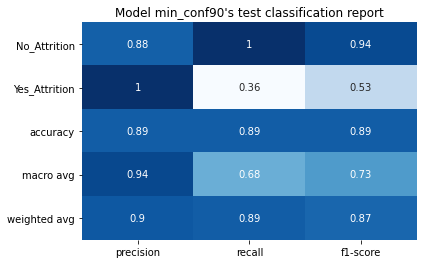

Confusion matrix, without normalization
[[730   0]
 [ 98  55]]


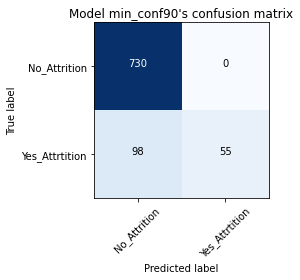

Normalized confusion matrix
[[1.         0.        ]
 [0.64052288 0.35947712]]


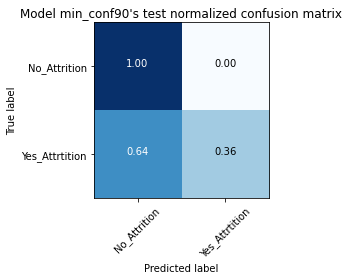

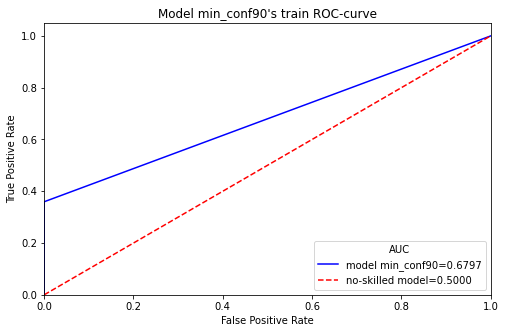

In [224]:
y_train = df_converted["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_converted)
plot_classification_report(y_train, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_train, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_train, y_pred, type_flag, color, models_global_info)

<h6>FP=1 </h6>

In [225]:
max_num_count_no = 1
model_name = "min_conf80"
type_flag = "train"
cmap = plt.cm.Greens
color = "green"

yes_attrition_indeces, no_attrition_indeces  =  support_count_given_fp_on_TR(max_num_count_no)
print("yes_attrition_indeces", len(yes_attrition_indeces))
print("no_attrition_indeces", len(no_attrition_indeces))

yes_attrition_indeces 91
no_attrition_indeces 29


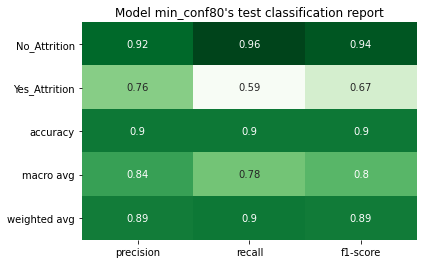

Confusion matrix, without normalization
[[701  29]
 [ 62  91]]


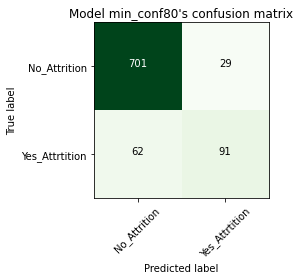

Normalized confusion matrix
[[0.96027397 0.03972603]
 [0.40522876 0.59477124]]


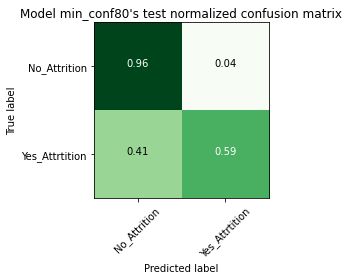

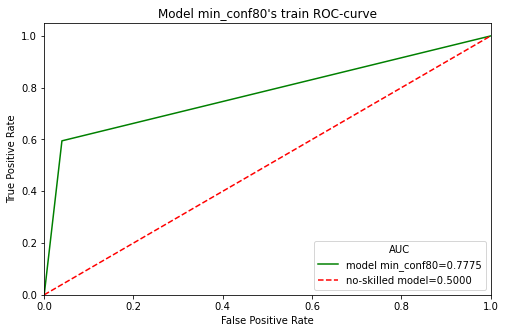

In [226]:
y_train = df_converted["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_converted)
plot_classification_report(y_train, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_train, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_train, y_pred, type_flag, color, models_global_info)

<h6>FP=2 </h6>

In [227]:
max_num_count_no = 2
model_name = "min_conf70"
type_flag = "train"
cmap = plt.cm.Oranges
color = "orange"

yes_attrition_indeces, no_attrition_indeces  =  support_count_given_fp_on_TR(max_num_count_no)
print("yes_attrition_indeces", len(yes_attrition_indeces))
print("no_attrition_indeces", len(no_attrition_indeces))

yes_attrition_indeces 118
no_attrition_indeces 88


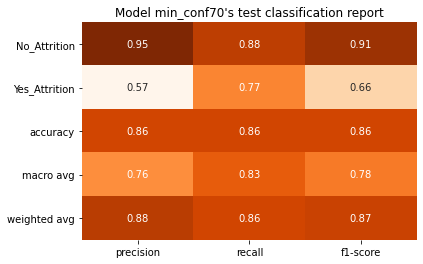

Confusion matrix, without normalization
[[642  88]
 [ 35 118]]


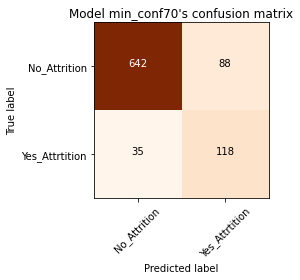

Normalized confusion matrix
[[0.87945205 0.12054795]
 [0.22875817 0.77124183]]


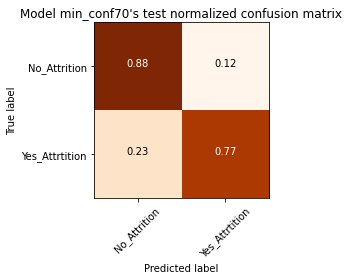

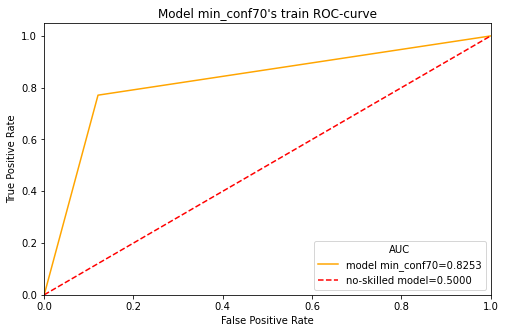

In [228]:
y_train = df_converted["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_converted)
plot_classification_report(y_train, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_train, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_train, y_pred, type_flag, color, models_global_info)

<h6>FP=3 </h6>

In [229]:
max_num_count_no = 3
model_name = "min_conf60"
type_flag = "train"
cmap = plt.cm.RdPu
color = "purple"

yes_attrition_indeces, no_attrition_indeces  =  support_count_given_fp_on_TR(max_num_count_no)
print("yes_attrition_indeces", len(yes_attrition_indeces))
print("no_attrition_indeces", len(no_attrition_indeces))

yes_attrition_indeces 130
no_attrition_indeces 156


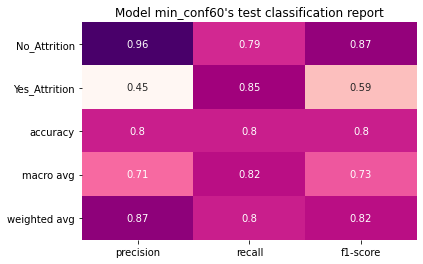

Confusion matrix, without normalization
[[574 156]
 [ 23 130]]


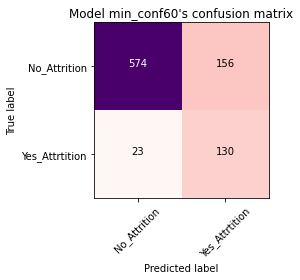

Normalized confusion matrix
[[0.78630137 0.21369863]
 [0.1503268  0.8496732 ]]


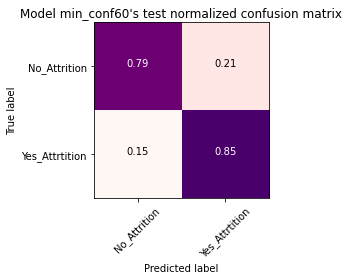

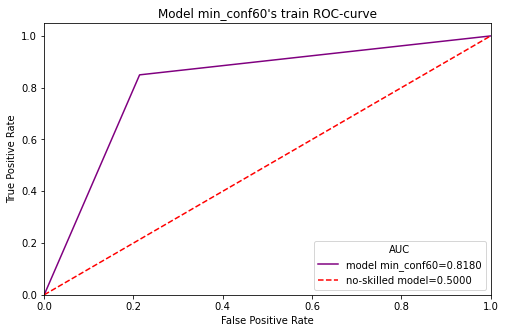

In [230]:
y_train = df_converted["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_converted)
plot_classification_report(y_train, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_train, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_train, y_pred, type_flag, color, models_global_info)

<h6>FP=4 </h6>

In [231]:
max_num_count_no = 4
model_name = "min_conf50"
type_flag = "train"
cmap = plt.cm.Greys
color = "grey"

yes_attrition_indeces, no_attrition_indeces  =  support_count_given_fp_on_TR(max_num_count_no)
print("yes_attrition_indeces", len(yes_attrition_indeces))
print("no_attrition_indeces", len(no_attrition_indeces))

yes_attrition_indeces 140
no_attrition_indeces 220


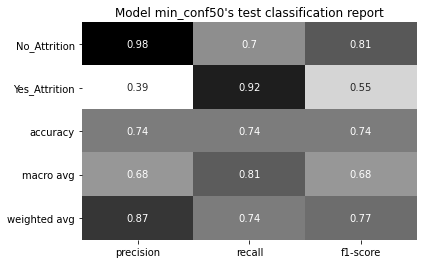

Confusion matrix, without normalization
[[510 220]
 [ 13 140]]


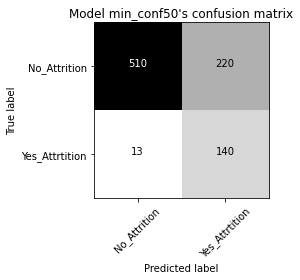

Normalized confusion matrix
[[0.69863014 0.30136986]
 [0.08496732 0.91503268]]


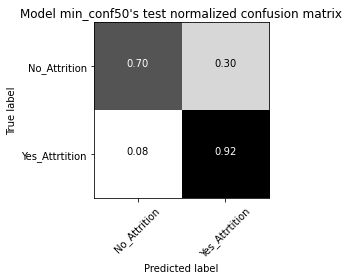

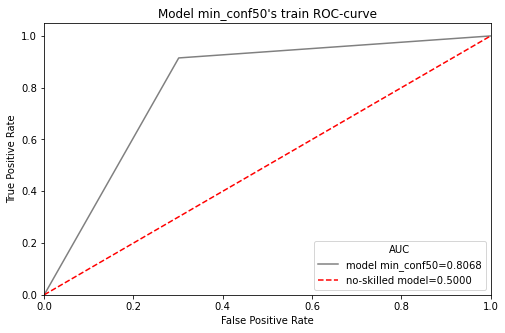

In [232]:
y_train = df_converted["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_converted)
plot_classification_report(y_train, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_train, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_train, y_pred, type_flag, color, models_global_info)

<h6>FP=5</h6>

In [233]:
max_num_count_no = 5
model_name = "min_conf40"
type_flag = "train"
cmap = plt.cm.spring_r
color = "fuchsia"

yes_attrition_indeces, no_attrition_indeces  =  support_count_given_fp_on_TR(max_num_count_no)
print("yes_attrition_indeces", len(yes_attrition_indeces))
print("no_attrition_indeces", len(no_attrition_indeces))

yes_attrition_indeces 143
no_attrition_indeces 300


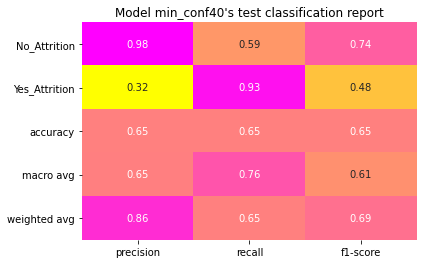

Confusion matrix, without normalization
[[430 300]
 [ 10 143]]


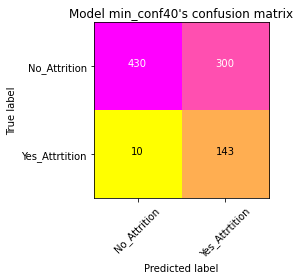

Normalized confusion matrix
[[0.5890411  0.4109589 ]
 [0.06535948 0.93464052]]


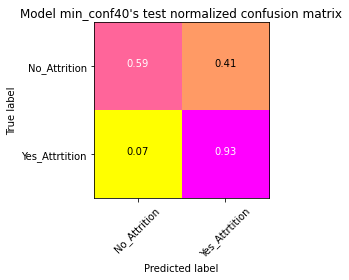

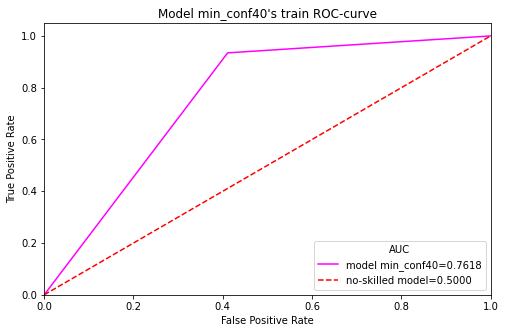

In [234]:
y_train = df_converted["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_converted)
plot_classification_report(y_train, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_train, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_train, y_pred, type_flag, color, models_global_info)

<h2> Classification on TS wit Yes-Attrtition ARs </h2>

<h6>FP=0 </h6>

In [235]:
max_num_count_no = 0
model_name = "min_conf90"
type_flag = "test"
cmap = plt.cm.Blues
color = "blue"

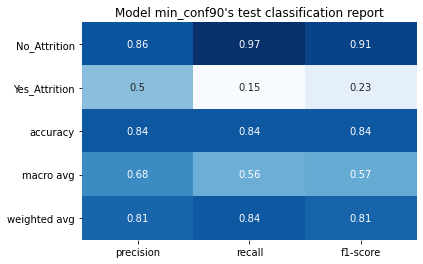

Confusion matrix, without normalization
[[180   5]
 [ 29   5]]


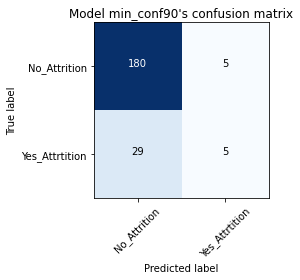

Normalized confusion matrix
[[0.97297297 0.02702703]
 [0.85294118 0.14705882]]


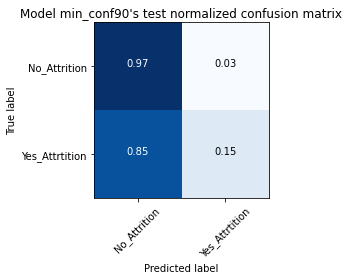

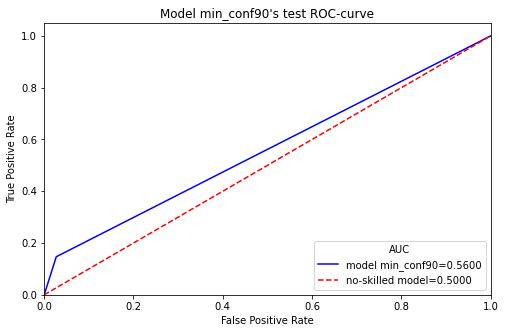

In [236]:
y_test = df_ts_conv["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_ts_conv)
plot_classification_report(y_test, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_test, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_test, y_pred, type_flag, color, models_global_info)

<h6>FP=1 </h6>

In [237]:
max_num_count_no = 1
model_name = "min_conf80"
type_flag = "test"
cmap = plt.cm.Greens
color = "green"

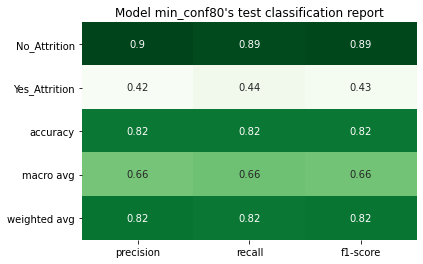

Confusion matrix, without normalization
[[164  21]
 [ 19  15]]


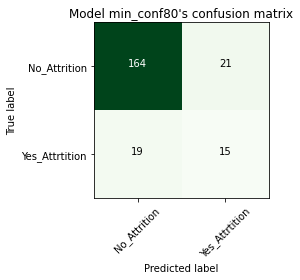

Normalized confusion matrix
[[0.88648649 0.11351351]
 [0.55882353 0.44117647]]


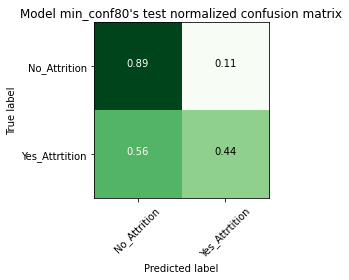

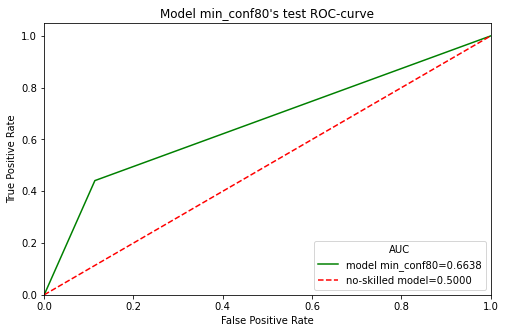

In [238]:
y_test = df_ts_conv["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_ts_conv)
plot_classification_report(y_test, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_test, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_test, y_pred, type_flag, color, models_global_info)

<h6>FP=2 </h6>

In [239]:
max_num_count_no = 2
model_name = "min_conf70"
type_flag = "test"
cmap = plt.cm.Oranges
color = "orange"

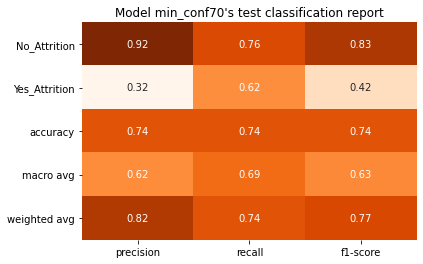

Confusion matrix, without normalization
[[141  44]
 [ 13  21]]


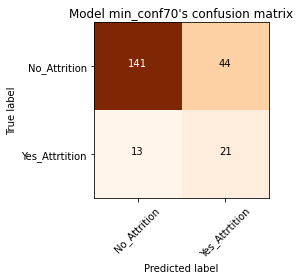

Normalized confusion matrix
[[0.76216216 0.23783784]
 [0.38235294 0.61764706]]


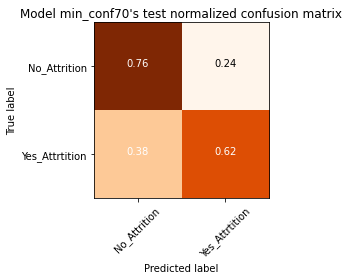

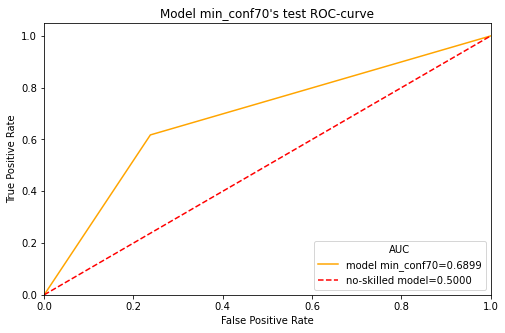

In [240]:
y_test = df_ts_conv["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_ts_conv)
plot_classification_report(y_test, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_test, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_test, y_pred, type_flag, color, models_global_info)

<h6>FP=3 </h6>

In [241]:
max_num_count_no = 3
model_name = "min_conf60"
type_flag = "test"
cmap = plt.cm.RdPu
color = "purple"

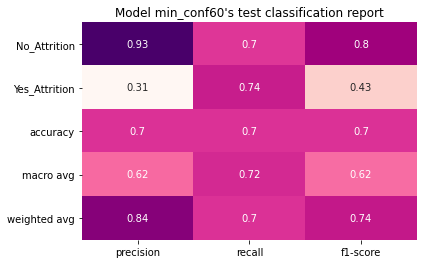

Confusion matrix, without normalization
[[129  56]
 [  9  25]]


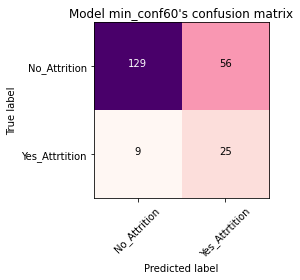

Normalized confusion matrix
[[0.6972973  0.3027027 ]
 [0.26470588 0.73529412]]


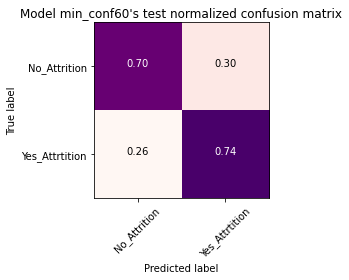

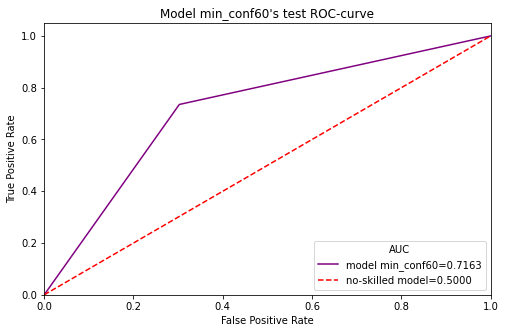

In [242]:
y_test = df_ts_conv["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_ts_conv)
plot_classification_report(y_test, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_test, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_test, y_pred, type_flag, color, models_global_info)

<h6>FP=4 </h6>

In [243]:
max_num_count_no = 4
model_name = "min_conf50"
type_flag = "test"
cmap = plt.cm.Greys
color = "grey"

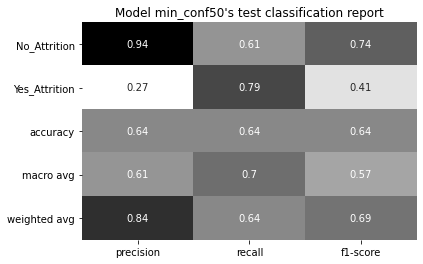

Confusion matrix, without normalization
[[113  72]
 [  7  27]]


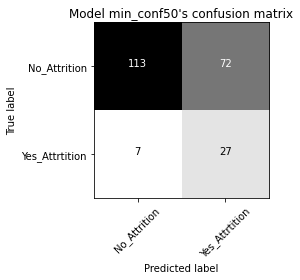

Normalized confusion matrix
[[0.61081081 0.38918919]
 [0.20588235 0.79411765]]


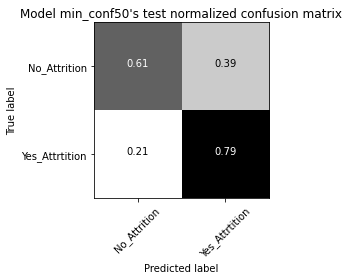

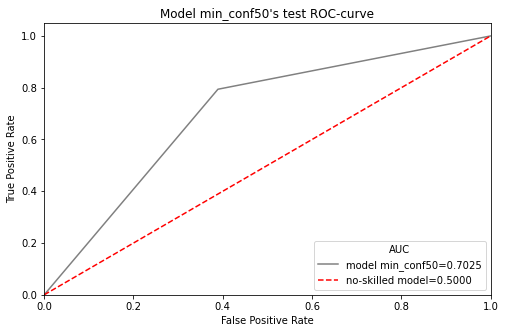

In [244]:
y_test = df_ts_conv["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_ts_conv)
plot_classification_report(y_test, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_test, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_test, y_pred, type_flag, color, models_global_info)

<h6>FP=5</h6>

In [245]:
max_num_count_no = 5
model_name = "min_conf40"
type_flag = "test"
cmap = plt.cm.spring_r
color = "fuchsia"

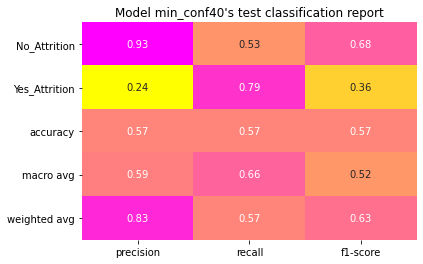

Confusion matrix, without normalization
[[98 87]
 [ 7 27]]


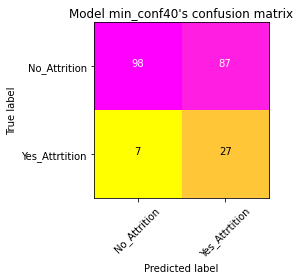

Normalized confusion matrix
[[0.52972973 0.47027027]
 [0.20588235 0.79411765]]


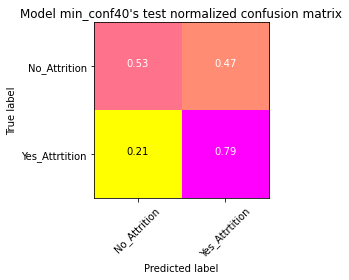

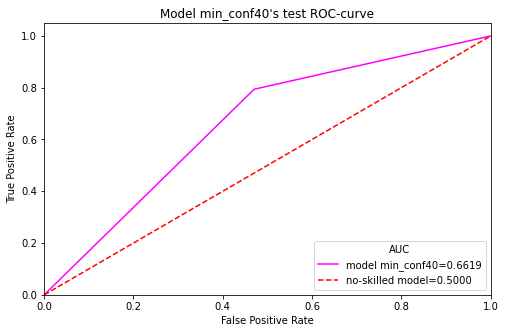

In [246]:
y_test = df_ts_conv["Attrition"]
y_pred = AR_classifier(max_num_count_no, df_ts_conv)
plot_classification_report(y_test, y_pred, cmap, model_name)
draw_normalized_confusion_matrises(model_name, y_test, y_pred, cmap)
draw_roc_and_pr_curves(model_name, y_test, y_pred, type_flag, color, models_global_info)

<h2> Train curves </h2>

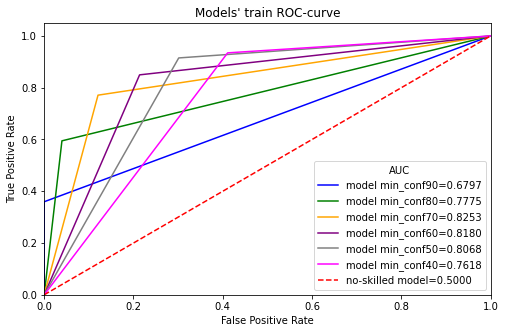

In [247]:
draw_multiple_roc_and_ap_curves("train", models_global_info)

<h2>Test curves </h2>

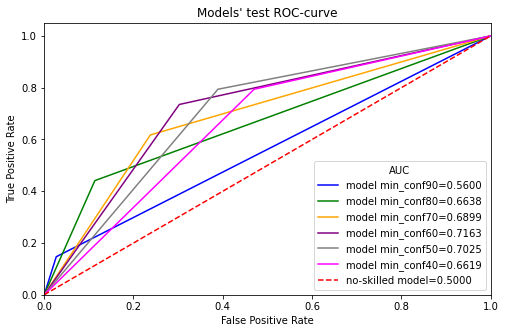

In [248]:
draw_multiple_roc_and_ap_curves("test", models_global_info)

In [249]:
import pickle
with open('kmeans_frequent_yes_attrition_models.pickle', 'wb') as handle:
    pickle.dump(models_global_info, handle, protocol=pickle.HIGHEST_PROTOCOL)

<h2>Missing values replacement in TR with Yes_Attrition ARs</h2>

In [250]:
impunters_global_info = {}  # impunters' classification info

In [251]:
missing_values_columns = missing_numeric_values_columns + missing_categorical_values_columns

In [252]:
def get_ARs_with_which_to_impunt(max_num_count_no, missing_column_name): 
    ar_impunters = set()
    fp_itemsets = get_itemsets_given_fp_on_TR(max_num_count_no)
    for itemset in fp_itemsets:
        # keeping only ARs which contains column's missing value
        if str(missing_column_name) in str(itemset):
            ar_impunters.add(itemset)
    return ar_impunters

In [253]:
def AR_impunter(max_num_count_no, df, record_indeces, missing_column_name):
    missing_column_index = df.columns.get_loc(missing_column_name)
    ar_impunters = get_ARs_with_which_to_impunt(max_num_count_no, missing_column_name)
        
    # for every itemset I'm checking if the variables of the record with missing value/s 
    # match the ones present in the itemset. If it does so and the itemset contains also 
    # variables with which to impunt record's missing value/s, I'm taking a MAJORITY VOTE
    # among all Yes_Attrition ARs to impunte the missing value/s
    mode_guessing = [""]*len(record_indeces)
    for record_index, ri in zip(record_indeces, range(0, len(record_indeces))):
        tmp_mode_guessing = []
        for itemset in ar_impunters:
            matching_AR_flag = True
            for i in range(0, len(itemset)):  # I'm using also Attrition this time
                if "BusinessTravel" in itemset[i]:
                    column_name = "BusinessTravel"
                else:
                    column_name = itemset[i].split("_")[1]
                column_index = df.columns.get_loc(column_name)
                if column_index != missing_column_index:
                    if df.iloc[record_index, column_index] != itemset[i]:
                        matching_AR_flag = False
                        break
            if matching_AR_flag:
                # replacing missing values with ARs
                for j in range(0, len(itemset)):
                    if "BusinessTravel" in itemset[j]:
                        column_name = "BusinessTravel"
                    else:
                        column_name = itemset[j].split("_")[1]
                    column_index = df.columns.get_loc(column_name)
                    if column_index == missing_column_index:
                        tmp_mode_guessing.append(itemset[j])
            if len(tmp_mode_guessing) > 0:
                mode_guessing[ri] =  max(set(tmp_mode_guessing), key=tmp_mode_guessing.count)  # MAJORITY VOTE
                    
    return mode_guessing

In [254]:
def impunt_missing_values(df, df2, max_num_count_no):
    # # list of lists (each list contains DataFrame's records missing values per column, 
    # where the column are either extracted from missing_numeric_values_columns
    # and missing_categorical_values_columns arrays merged together)
    missing_values_record_indeces = []  
    
    # checking each record's missing values 
    # N.B if a record has more than one missing value, it will show multiple times
    # in the index process memorisation, but in different lists (different columns 
    # to impute)
    for column_name in missing_values_columns:
        column_attrition_index = df.columns.get_loc("Attrition")
        tmp_missing_idx = []
        for i in range(0, len(df)):
            column_index = df.columns.get_loc(column_name)
            try:
                df.iloc[i,column_index].split("_")
            except AttributeError:  # missing value (nan value)
                # missing value replacement with Yes_Attrition ARs
                if df.iloc[i,column_attrition_index] == "Yes_Attrition": #TODO: remove if, when using all ARs
                    tmp_missing_idx.append(i)
                else: #TODO: remove else, when using all ARs
                    df.iloc[i,column_index] = df2.iloc[i,column_index]
                    
        missing_values_record_indeces.append(tmp_missing_idx)
    
    imputed_values = []
    for i in range(0, len(missing_values_columns)):
        record_indeces = missing_values_record_indeces[i]
        missing_column_name = missing_values_columns[i]
        missing_column_index = df.columns.get_loc(missing_column_name)
        mode_guessing = AR_impunter(max_num_count_no, df, record_indeces, missing_column_name)
        imputed_values.append(mode_guessing)
        
        not_impunted_records = 0
        for j in range(0, len(record_indeces)):
            if mode_guessing[j]:  # empty string == False
                # df.iloc[record_indeces[j], missing_column_index] = mode_guessing[j]
                pass
            else:
                 not_impunted_records += 1
        print("column %s impunted records=%d" % (missing_column_name, len(record_indeces) - not_impunted_records))
        print("column %s NOT impunted records=%d" % (missing_column_name, not_impunted_records))
        
    # return df  # imputation is made inside the function 
    return missing_values_record_indeces, imputed_values

In [255]:
def get_impunted_train(df, indeces, column_index):
    y_train = []
    for idx in indeces:
        y_train.append(df.iloc[idx, column_index])
    return y_train

In [256]:
def imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color):
    all_y_train = []
    all_y_pred = []
    for column_name, i in zip(missing_values_columns, range(0, len(missing_values_columns))):
        if type_flag == "train":
            column_index = df_converted.columns.get_loc(column_name)
            y_train = get_impunted_train(df_converted, missing_record_indeces[i], column_index)
        elif type_flag == "test":
            column_index = df_ts_conv.columns.get_loc(column_name)
            y_train = get_impunted_train(df_ts_conv, missing_record_indeces[i], column_index)
        else:
            print("Wrong type_flag %s" % type_flag)
            sys.exit(-1)
        y_pred = imputed_values[i]
        if len(y_train) != len(y_pred):
            print("different len in impunted test for column_name %s" % column_name)
            sys.exit(-1)
        all_y_train += y_train
        all_y_pred += y_pred
    print(classification_report(all_y_train, all_y_pred))
    # plot_imputation_report(all_y_train, all_y_pred, cmap, model_name, list(set(all_y_train)))
    # draw_normalized_confusion_matrises(model_name, all_y_train, all_y_pred, cmap)
    # draw_roc_and_pr_curves(model_name, all_y_train, all_y_pred, type_flag, color, impunters_global_info)

<h2> Train imputation </h2>

<h6>FP=0</h6>

In [257]:
max_num_count_no = 0
model_name = max_num_count_no
type_flag = "train"
cmap = plt.cm.Blues
color = "blue"

In [258]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_not_impunted_converted, df_converted, max_num_count_no)

column Age impunted records=0
column Age NOT impunted records=18
column YearsAtCompany impunted records=0
column YearsAtCompany NOT impunted records=11
column MonthlyIncome impunted records=9
column MonthlyIncome NOT impunted records=19
column TaxRate impunted records=0
column TaxRate NOT impunted records=28
column TrainingTimesLastYear impunted records=5
column TrainingTimesLastYear NOT impunted records=36
column BusinessTravel impunted records=6
column BusinessTravel NOT impunted records=11
column Gender impunted records=0
column Gender NOT impunted records=6


In [259]:
# imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=1</h6>

In [260]:
max_num_count_no = 1
model_name = max_num_count_no
type_flag = "train"
cmap = plt.cm.Greens
color = "green"

In [261]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_not_impunted_converted, df_converted, max_num_count_no)

column Age impunted records=2
column Age NOT impunted records=16
column YearsAtCompany impunted records=3
column YearsAtCompany NOT impunted records=8
column MonthlyIncome impunted records=12
column MonthlyIncome NOT impunted records=16
column TaxRate impunted records=0
column TaxRate NOT impunted records=28
column TrainingTimesLastYear impunted records=23
column TrainingTimesLastYear NOT impunted records=18
column BusinessTravel impunted records=10
column BusinessTravel NOT impunted records=7
column Gender impunted records=3
column Gender NOT impunted records=3


In [262]:
# imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=2</h6>

In [263]:
max_num_count_no = 2
model_name = max_num_count_no
type_flag = "train"
cmap = plt.cm.RdPu
color = "purple"

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_not_impunted_converted, df_converted, max_num_count_no)

column Age impunted records=6
column Age NOT impunted records=12
column YearsAtCompany impunted records=5
column YearsAtCompany NOT impunted records=6
column MonthlyIncome impunted records=13
column MonthlyIncome NOT impunted records=15
column TaxRate impunted records=12
column TaxRate NOT impunted records=16
column TrainingTimesLastYear impunted records=33
column TrainingTimesLastYear NOT impunted records=8


In [ ]:
# imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=3</h6>

In [ ]:
max_num_count_no = 3
model_name = max_num_count_no
type_flag = "train"
cmap = plt.cm.Oranges
color = "orange"

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_not_impunted_converted, df_converted, max_num_count_no)

In [ ]:
# imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=4</h6>

In [ ]:
max_num_count_no = 4
model_name = max_num_count_no
type_flag = "train"
cmap = plt.cm.Greys
color = "grey"

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_not_impunted_converted, df_converted, max_num_count_no)

In [ ]:
imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=5</h6>

In [ ]:
max_num_count_no = 5
model_name = max_num_count_no
type_flag = "train"
cmap = plt.cm.spring_r
color = "fuchsia"

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_not_impunted_converted, df_converted, max_num_count_no)

In [ ]:
imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=6</h6>

In [ ]:
max_num_count_no = 6
model_name = max_num_count_no
type_flag = "train"
cmap = plt.cm.spring_r
color = "fuchsia"

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_not_impunted_converted, df_converted, max_num_count_no)

In [ ]:
imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=7</h6>

In [ ]:
max_num_count_no = 7
model_name = max_num_count_no
type_flag = "train"
cmap = plt.cm.spring_r
color = "fuchsia"

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_ts_not_impunted_converted, df_converted, max_num_count_no)

In [ ]:
imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h2> Test imputation </h2>

<h6>FP=0</h6>

In [ ]:
max_num_count_no = 0
model_name = max_num_count_no
type_flag = "test"
cmap = plt.cm.Blues
color = "blue"

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_ts_not_imp_conv, df_ts_conv, max_num_count_no)

In [ ]:
# imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=1</h6>

In [ ]:
max_num_count_no = 1
model_name = max_num_count_no
type_flag = "test"
cmap = plt.cm.Greens
color = "green"

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_ts_not_imp_conv, df_ts_conv, max_num_count_no)

In [ ]:
# imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=2</h6>

In [ ]:
max_num_count_no = 2
model_name = max_num_count_no
type_flag = "test"
cmap = plt.cm.RdPu
color = "purple"

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_ts_not_imp_conv, df_ts_conv, max_num_count_no)

In [ ]:
# imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=3</h6>

In [ ]:
max_num_count_no = 3
model_name = max_num_count_no
type_flag = "test"
cmap = plt.cm.Oranges
color = "orange"

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_ts_not_imp_conv, df_ts_conv, max_num_count_no)

In [ ]:
# imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=4</h6>

In [ ]:
max_num_count_no = 4
model_name = max_num_count_no
type_flag = "test"
cmap = plt.cm.Greys
color = "grey"

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_ts_not_imp_conv, df_ts_conv, max_num_count_no)

In [ ]:
imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=5</h6>

In [ ]:
max_num_count_no = 5
model_name = max_num_count_no
type_flag = "test"
cmap = plt.cm.spring_r
color = "fuchsia"

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_ts_not_imp_conv, df_ts_conv, max_num_count_no)

In [ ]:
imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=6</h6>

In [ ]:
max_num_count_no = 6
model_name = max_num_count_no
type_flag = "test"
cmap = plt.cm.spring_r
color = "fuchsia"

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_ts_not_imp_conv, df_ts_conv, max_num_count_no)

In [ ]:
imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

<h6>FP=7</h6>

In [ ]:
max_num_count_no = 7
model_name = max_num_count_no
type_flag = "test"
cmap = plt.cm.spring_r
color = "fuchsia"

In [ ]:
imputation_performance(missing_record_indeces, imputed_values, model_name, type_flag, cmap, color)

In [ ]:
missing_record_indeces, imputed_values = \
                            impunt_missing_values(df_ts_not_imp_conv, df_ts_conv, max_num_count_no)